PCA LDA Demo Viz
---

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv('df_LDA.csv')

In [4]:
df.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,class
0,5.010635,0.693147,2.302585,0.190620,1.945910,5.902633,medium
1,5.420535,0.693147,3.828641,0.322083,1.098612,5.874931,expensive
2,5.017280,1.386294,0.009950,0.009950,0.693147,5.902633,medium
3,4.499810,0.693147,5.602119,1.729884,0.693147,5.273000,medium
4,4.394449,2.397895,2.302585,0.095310,0.693147,0.009950,cheap


In [5]:
# drop class column
df = df.drop(['class'], axis=1)

In [6]:
# import kmeans 
from sklearn.cluster import KMeans

In [7]:
model = KMeans(3)
model.fit(df)

/Users/patrick/opt/anaconda3/envs/Python_3_9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [8]:
# create df with original features and predicted clusters
df_with_clusters = df.copy()
df_with_clusters['Cluster'] = model.predict(df)
df_with_clusters.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Cluster
0,5.010635,0.693147,2.302585,0.190620,1.945910,5.902633,0
1,5.420535,0.693147,3.828641,0.322083,1.098612,5.874931,2
2,5.017280,1.386294,0.009950,0.009950,0.693147,5.902633,0
3,4.499810,0.693147,5.602119,1.729884,0.693147,5.273000,2
4,4.394449,2.397895,2.302585,0.095310,0.693147,0.009950,1


### Perform cluster with PCA

#### We have 3 clusters so now we can visualize them using PCA

In [9]:
# import PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2).set_output(transform ='pandas')
df_pca = pca.fit_transform(df)
df_pca.head()

,pca0,pca1
0,2.871536,-0.505167
1,3.186472,1.023393
2,2.115710,-2.474429
3,3.182513,3.209837
4,-2.813498,0.755413


In [10]:
# create a scatter plot using two pcs and color by cluster
df_pca_with_clusters = df_pca.copy()
df_pca_with_clusters['Cluster'] = df_with_clusters['Cluster']
df_pca_with_clusters.head()

,pca0,pca1,Cluster
0,2.871536,-0.505167,0
1,3.186472,1.023393,2
2,2.115710,-2.474429,0
3,3.182513,3.209837,2
4,-2.813498,0.755413,1


In [11]:
#to visuilize centroids in PCA space, we also need to transform them
pca_centroids = pca.transform(model.cluster_centers_)
pca_centroids


/Users/patrick/opt/anaconda3/envs/Python_3_9/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,pca0,pca1
0,1.742682,-1.799298
1,-2.869047,0.160632
2,2.205815,1.268102


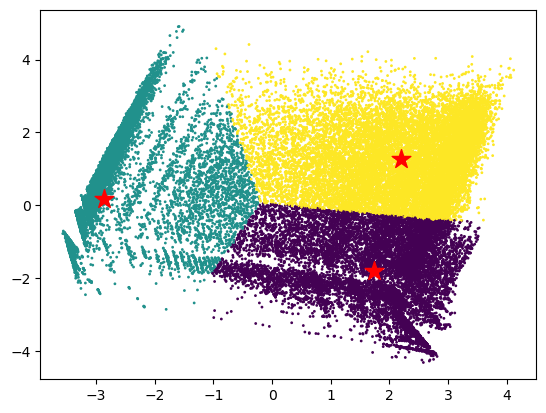

In [12]:
plt.scatter(df_pca_with_clusters['pca0'], df_pca_with_clusters['pca1'], c=df_pca_with_clusters['Cluster'], s=1)
plt.scatter(pca_centroids['pca0'], pca_centroids['pca1'], marker='*', s=200, c='red')

In [13]:
pca.components_

array([[ 0.02239149,  0.04122039,  0.27147007,  0.10814064,  0.11385044,
         0.94839189],
       [-0.06296314, -0.25667813,  0.87661448,  0.24413661, -0.20988628,
        -0.24092343]])

df_LDA.head()

In [14]:
df.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,5.010635,0.693147,2.302585,0.190620,1.945910,5.902633
1,5.420535,0.693147,3.828641,0.322083,1.098612,5.874931
2,5.017280,1.386294,0.009950,0.009950,0.693147,5.902633
3,4.499810,0.693147,5.602119,1.729884,0.693147,5.273000
4,4.394449,2.397895,2.302585,0.095310,0.693147,0.009950


In [15]:
# if we want interpretability, we can use the mean (encoded) values of each feature in each cluster

In [16]:
cluster_0_means = df[df_with_clusters['Cluster'] == 0].mean()
cluster_1_means = df[df_with_clusters['Cluster'] == 1].mean()
cluster_2_means = df[df_with_clusters['Cluster'] == 2].mean()

means = pd.DataFrame([cluster_0_means, cluster_1_means, cluster_2_means])
means

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,4.886993,2.020476,0.879110,0.293129,1.639183,5.089853
1,4.674813,1.374953,1.381022,0.261627,0.795121,0.221805
2,4.693314,1.232858,3.675706,1.108006,1.005979,4.799794


In [17]:
# create a radar plot to visualize the means
import plotly.graph_objects as go

means = pd.DataFrame([cluster_0_means, cluster_1_means, cluster_2_means])

fig = go.Figure()
fig.add_trace(go.Scatterpolar(r=means.iloc[0], theta=means.columns, fill='toself', name='Cluster 0'))
fig.add_trace(go.Scatterpolar(r=means.iloc[1], theta=means.columns, fill='toself', name='Cluster 1'))
fig.add_trace(go.Scatterpolar(r=means.iloc[2], theta=means.columns, fill='toself', name='Cluster 2'))

fig.update_layout()
fig.show()


In [18]:
##

# Using LDA
---

In [21]:
# LDA model
#Dataset has needs to have class labels
df_with_clusters.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Cluster
0,5.010635,0.693147,2.302585,0.190620,1.945910,5.902633,0
1,5.420535,0.693147,3.828641,0.322083,1.098612,5.874931,2
2,5.017280,1.386294,0.009950,0.009950,0.693147,5.902633,0
3,4.499810,0.693147,5.602119,1.729884,0.693147,5.273000,2
4,4.394449,2.397895,2.302585,0.095310,0.693147,0.009950,1


In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [44]:
y = df_with_clusters['Cluster']
X = df_with_clusters.loc[:,'price':'availability_365'].values

In [36]:
target_names = ['Cluster 0', 'Cluster 1', 'Cluster 2']
feature_names = df_with_clusters.loc[:,'price':'availability_365'].columns

In [42]:
df = pd.DataFrame(x, columns=feature_names)
df['Cluster'] = y

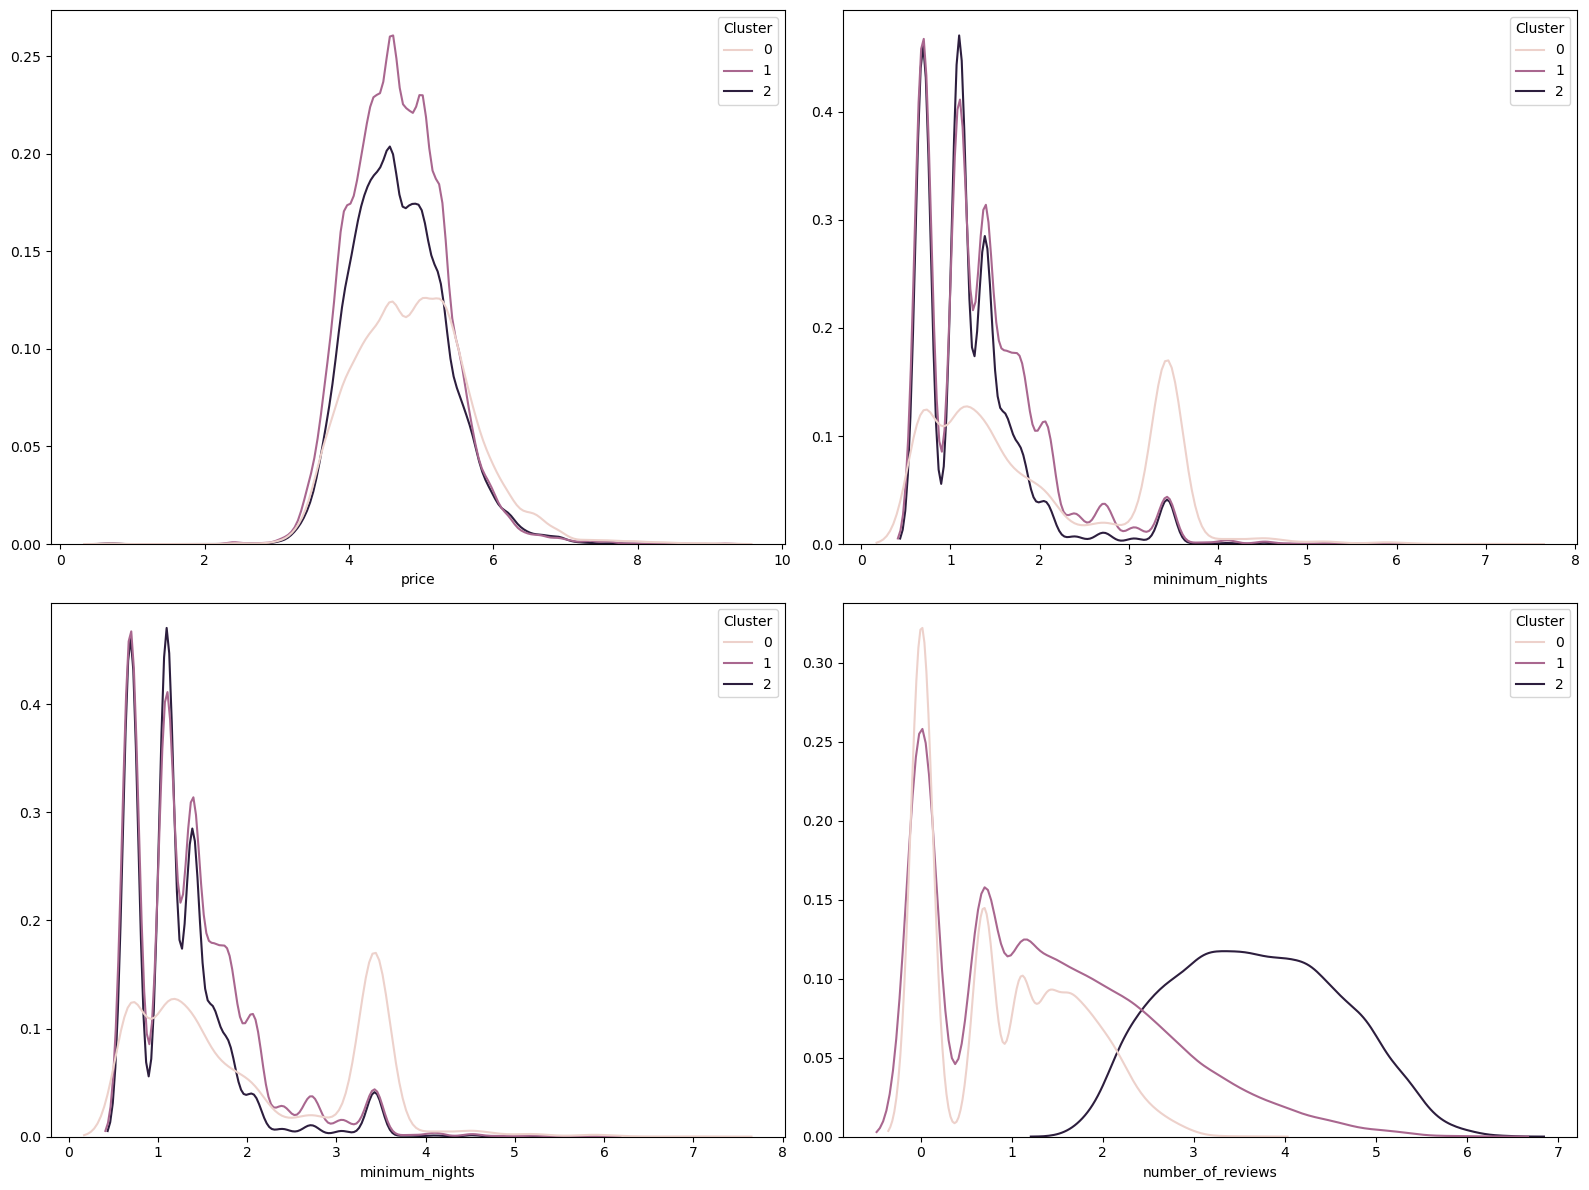

In [43]:
fig, axs = plt.subplots(2, 2, figsize=(16,12))
for i in range (2):
    for j in range (2):
        sns.kdeplot(hue='Cluster', x=feature_names[i+j], data=df, ax=axs[i,j])
        axs[i,j].set_ylabel('')
fig.tight_layout()

In [45]:
# peform LDA
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X,y)
X_reduced = lda.transform(X)

In [46]:
lda_feature_names = ['LDA dim=1', 'LDA dim=2']
df_reduced = pd.DataFrame(X_reduced, columns=lda_feature_names)
df_reduced['Cluster'] = y

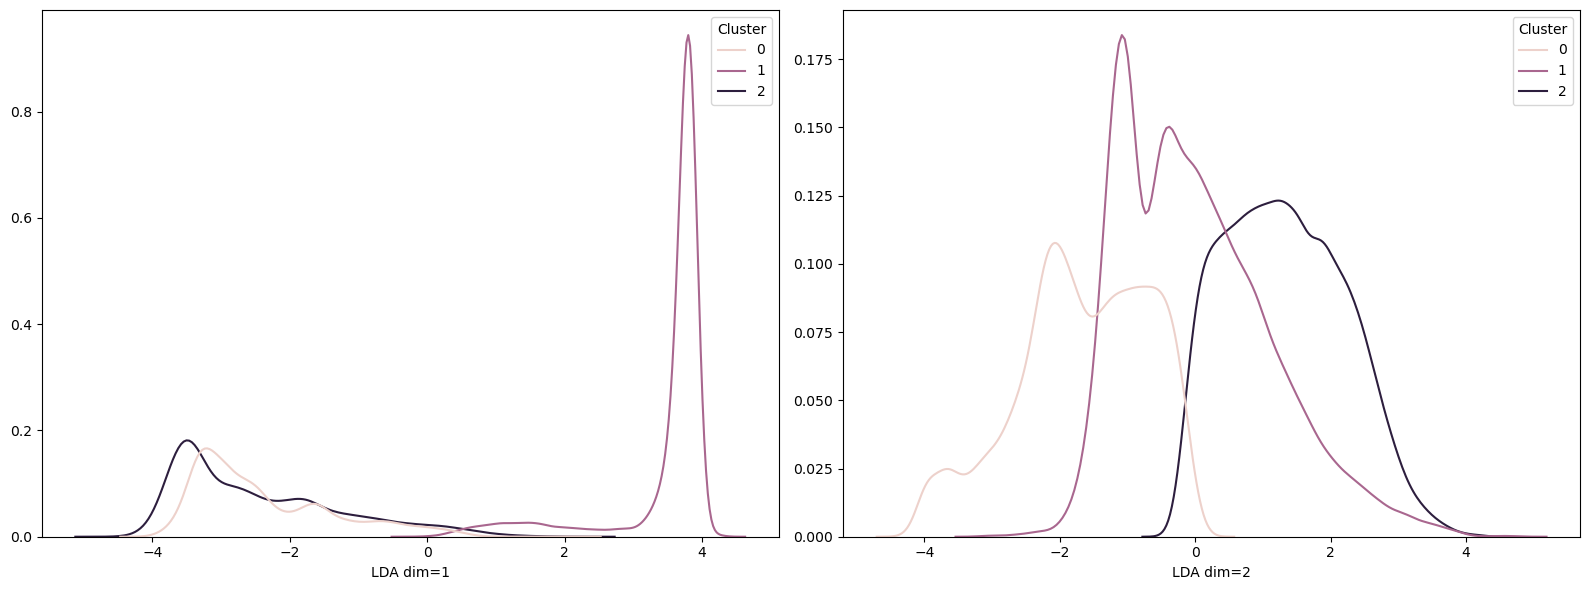

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
for i in range (2):
        sns.kdeplot(hue='Cluster', x=lda_feature_names[i], data=df_reduced, ax=axs[i])
        axs[i].set_ylabel('')
fig.tight_layout()

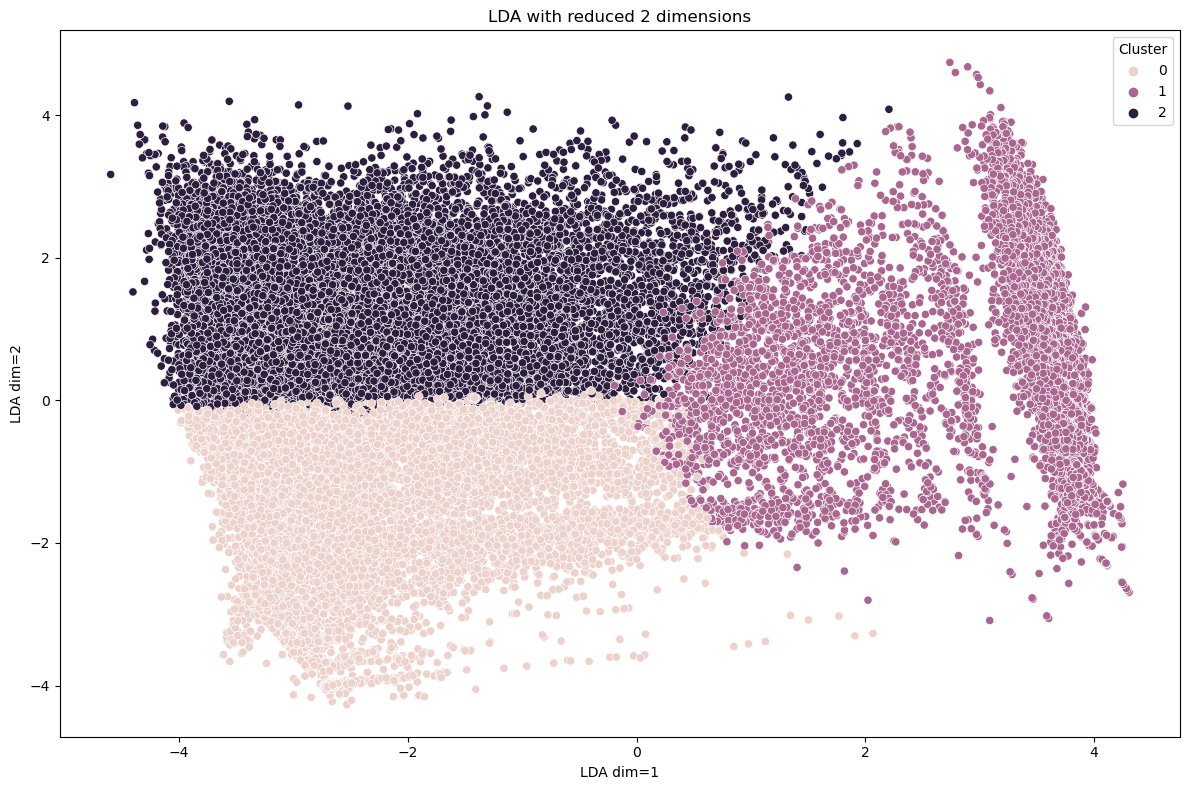

In [61]:
# Scatter plot LDA with the reduced 2 dimensions
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x = lda_feature_names[0], y = lda_feature_names[1], hue='Cluster', data=df_reduced, ax=ax)
ax.set_title('LDA with reduced 2 dimensions')
fig.tight_layout()